In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (16, 9)

# Import dataset
df = pd.read_csv('transfusion.data')
df.head()
# df.info()


,recency,frequency,monetary,time,class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
X = df[['recency', 'frequency', 'monetary']]

y = df['class']

X.head()

,recency,frequency,monetary
0,2,50,12500
1,0,13,3250
2,1,16,4000
3,2,20,5000
4,1,24,6000


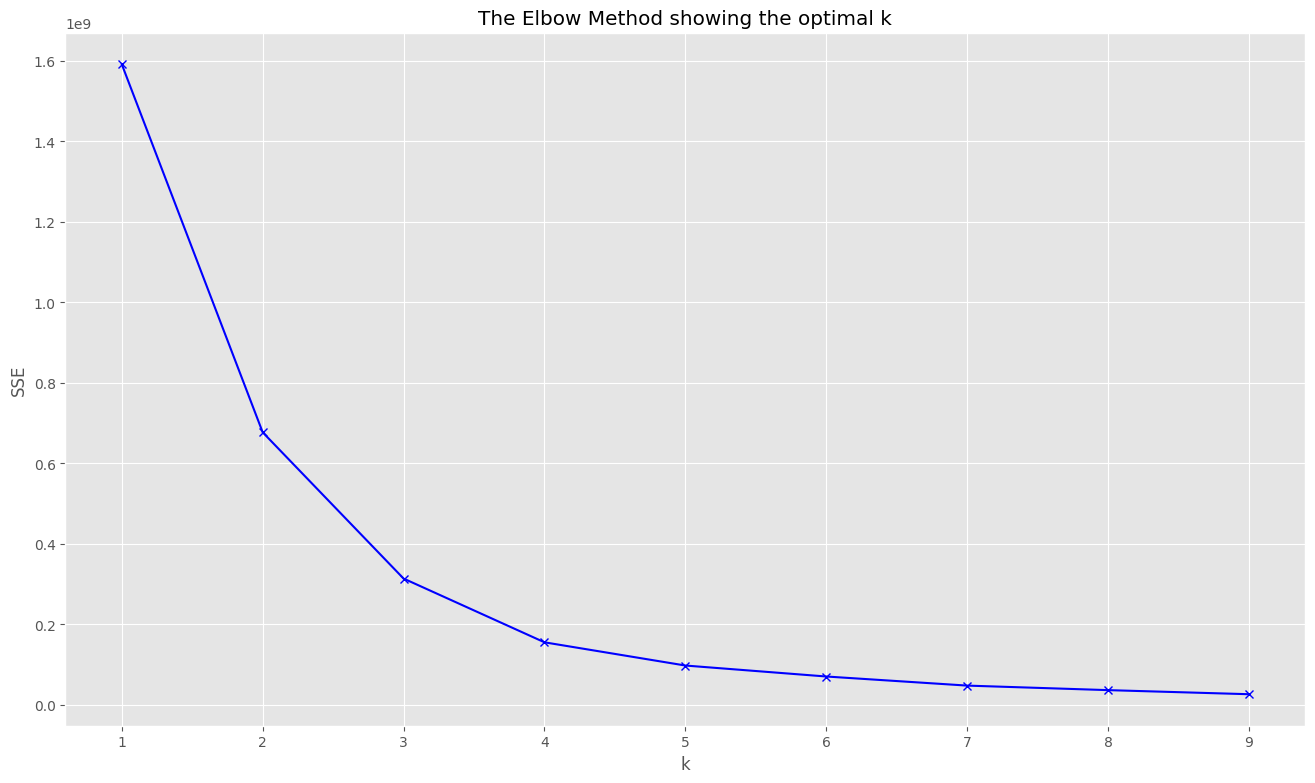

In [4]:
sse = []
for k in range(1, 10):
 kmeans = KMeans(n_clusters=k).fit(X)
 sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 385 out of 748 samples were correctly labeled.
Accuracy score: 0.51


In [6]:
centroids = kmeans.cluster_centers_

import pickle

# Menyimpan model ke dalam file pickle
with open('centroids.pkl', 'wb') as f:
     pickle.dump(centroids, f)
     print('Centroids tersimpan ke dalam file pickle')

Centroids tersimpan ke dalam file pickle


# **Visualisasi Cluster**

In [7]:
at1 = X['recency'].values
at2 = X['frequency'].values
at3 = X['monetary'].values

X = np.array(list(zip(at1, at2, at3))) 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='jet')

<Figure size 1600x900 with 0 Axes>